In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))
import nbimporter

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from preprocessing.feature_engineering import Preprocessor

In [6]:
df = pd.read_csv('../data/mall_customers.csv')
preprocessor = Preprocessor(df)
preprocessed_df = preprocessor.transform()

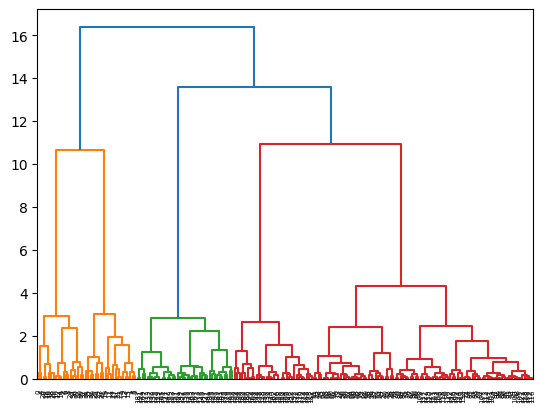

In [9]:
linkage_matrix =linkage(preprocessed_df, method='ward')
dendrogram(linkage_matrix);

In [14]:
hierarchy_model = AgglomerativeClustering(n_clusters=6, linkage='ward')
hierarchy_predict = hierarchy_model.fit_predict(preprocessed_df)
silhouette_score(preprocessed_df, hierarchy_predict)

0.5776482420542308

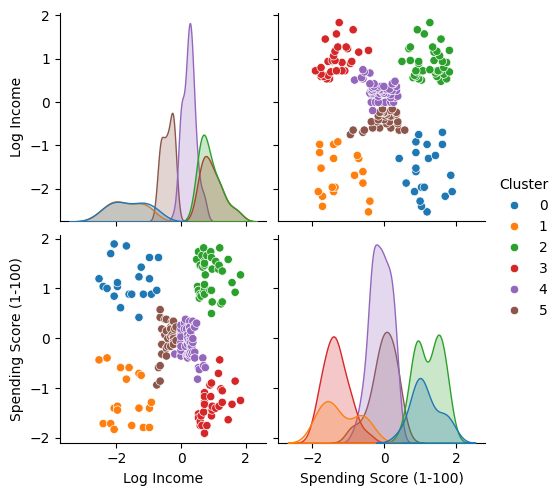

In [15]:
preprocessed_df['Cluster'] = hierarchy_predict
sns.pairplot(preprocessed_df, hue="Cluster", palette="tab10")